In [59]:
import tensorflow as tf
import keras
import os
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

import imageio
import matplotlib.image as img
# data ogmintation
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
import numpy as np

In [3]:
data_path = pathlib.Path("D:/AI/deplome AI/SC13/Rice_Image_Dataset (1)/Rice_Image_Dataset")

In [33]:
# return the folders :
arborio =list(data_path.glob('Arborio/*'))[:1000]
basmati =list(data_path.glob('Basmati/*'))[:1000]
ipsala =list(data_path.glob('Ipsala/*'))[:1000]
jasmine =list(data_path.glob('Jasmine/*'))[:1000]
karacadag =list(data_path.glob('Karacadag/*'))[:1000]

In [34]:
# data
data ={
    'arborio':arborio,
    'basmati':basmati,
    'ipsala':ipsala,
    'jasmine':jasmine,
    'karacadag':karacadag,
}

In [35]:
# label:
rice_labels ={
    0:'Arborio',
    1:'Basmati',
    2:'Ipsala',
    3:'Jasmine',
    4:'Karacadag'
}

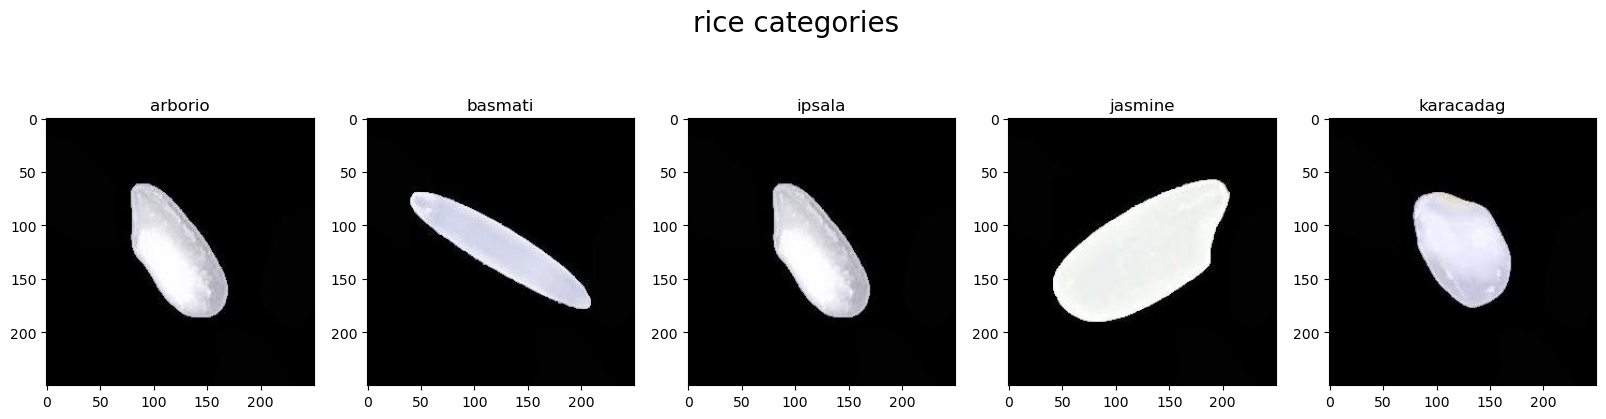

In [36]:
fig,ax = plt.subplots (ncols = 5, figsize=(20,5))
fig.suptitle("rice categories", fontsize =20)

arborio_img = img.imread(arborio[1])
basmati_img = img.imread(basmati[1])
ipsala_img = img.imread(ipsala[1])
jasmine_img = img.imread(jasmine[1])
karacadag_img = img.imread(karacadag[1])

for index,name in enumerate(list(data.keys())):
    ax[index].set_title(name)
ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(arborio_img)
ax[3].imshow(ipsala_img)
ax[4].imshow(karacadag_img)

In [37]:
# use in: make more image --- scale data ----data_split--- preprocessing in the image:
train_gen = ImageDataGenerator(rescale =1./255, validation_split =0.2)

train_data = train_gen.flow_from_directory("D:/AI/deplome AI/SC13/Rice_Image_Dataset (1)/Rice_Image_Dataset",
                                      target_size=(224,224),
                                      batch_size =32,
                                      class_mode ='categorical',
                                      shuffle= True,
                                     subset ='training')
test_data =train_gen.flow_from_directory("D:/AI/deplome AI/SC13/Rice_Image_Dataset (1)/Rice_Image_Dataset",
                                      target_size=(224,224),
                                      batch_size =1,
                                      class_mode ='categorical',
                                      shuffle= True,
                                   subset ='validation')


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [38]:
model = Sequential()

In [43]:
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(100,activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(50,activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(50,activation = tf.keras.activations.relu))

model.add(tf.keras.layers.Dense(5,activation =tf.keras.activations.sigmoid))

In [52]:
model.compile(optimizer ='adam',
             loss ='categorical_crossentropy',
             metrics ='accuracy')

In [53]:
model.fit(train_data,validation_data = test_data ,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 566s 301ms/step - loss: 0.1879 - accuracy: 0.9352 - val_loss: 0.0938 - val_accuracy: 0.9691
Epoch 2/2
1875/1875 [==============================] - 540s 288ms/step - loss: 0.1084 - accuracy: 0.9658 - val_loss: 0.1307 - val_accuracy: 0.9513


In [54]:
loss_val,acc_val = model.evaluate(test_data)

15000/15000 [==============================] - 151s 10ms/step - loss: 0.1307 - accuracy: 0.9513


In [55]:
print(loss_val)
print(acc_val)

0.1306801587343216
0.9512666463851929


In [56]:
y_pred= model.predict(test_data)

15000/15000 [==============================] - 132s 9ms/step


In [57]:
y_pred

array([[9.7509986e-01, 5.6043297e-02, 2.5326106e-01, 2.0216332e-01,
        3.5333666e-01],
       [8.9064240e-02, 6.0463834e-01, 1.8110653e-02, 9.8043907e-01,
        2.5179500e-03],
       [1.4781812e-01, 2.6668626e-01, 6.5983129e-01, 9.9120808e-01,
        7.2474056e-03],
       ...,
       [9.9993140e-01, 1.9196860e-07, 1.0000000e+00, 9.9998522e-01,
        1.2623216e-04],
       [9.9986231e-01, 6.1574571e-07, 1.0000000e+00, 9.9996263e-01,
        2.7657975e-04],
       [5.8109529e-04, 9.7434372e-01, 1.1470685e-04, 7.3030323e-01,
        3.0604468e-05]], dtype=float32)

In [60]:
y_pred = np.argmax(y_pred,axis=1)

In [61]:
y_pred

array([0, 3, 3, ..., 2, 2, 1], dtype=int64)

In [65]:
train_score =model.evaluate(train_data ,verbose=1)

1875/1875 [==============================] - 2984s 2s/step - loss: 0.1258 - accuracy: 0.9544


In [ ]:
# test_score =model.evaluate(test_data ,verbose =1)